# Dataverwerking sterrenkundeproef

Deze notebook is een **tool** bij het analyseren van de data. Dit is **geen** vervanging voor de instructies in de practicumhandleiding. Sterker nog, de handleiding bevat hints die hier niet genoemd zijn. Lees deze dus zeker goed door!

## Laden van packages

Als een package nog niet geïnstalleerd is, kun je dit doen door de **anaconda prompt** te openen en de volgende command uit te voeren:

```
pip install <package>
```

waarbij je ```<package>``` verandert door de te installeren package.

In [4]:
# Standaard Python bibliotheek
import glob

# Te Installeren
import astropy.io.fits as pf
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

from astropy import constants as const

## Voorbereiding

Om een goed gevoel te krijgen voor de data is het handig om eerst de snelheid uit één van de spectra te bepalen. Op die manier krijg je al een idee van je strategie en raak je straks niet verdwaald in de grote hoeveelheid data.

Zorg zeker ook dat je de data goed begrijpt voordat je aan de analyse begint: **welke info heb je en wat wil je hiermee bereiken?**

### Data laden

Om te beginnen moet je de spectra inladen. Je hebt een map gekregen met een specifieke naam, namelijk de sternaam. In deze map zitten spectrale gegevens en een txt.bestand (LijnLijst.txt). Sla deze notebook op dezelfde plek op als die map. Dan kan je met volgende code je spectra inlezen.

In [9]:
sternaam = 'BD+39_4926' # Vul hier de naam van de ster in

# Maak een lijst van alle spectra. Data is in FITS format
datalist = glob.glob("%s/*.fits" %sternaam)
datalist.sort()
#print(datalist)


# Inlezen van de spectrale lijnen. De goflengte is in rust en in lucht (niet vacuum)
inputfile = "%s/LijnLijst.txt" %sternaam
lines,weights = np.loadtxt(inputfile,usecols=(0,1),unpack=True)

In [10]:
# Neem een willekeurig spectrum als voorbeeld
# Spec = intensiteit
# Header laadt de metadata in (o.a. wie de waarnemer was, datum van de observatie...)
spec = pf.getdata(datalist[2])
header = pf.getheader(datalist[2])

### Bereid de datastructuur voor

- Inlezen van de meta-data uit header 
- Aanmaken van een golflengtegrid

- **Extra**: Ga voor jezelf na hoe de golflengtegrid wordt aangemaakt

In [12]:
def golflengte_grid(spec, header):

    # Lees meta-data
    ref_pix = int(header['CRPIX1'])-1   # index van de referentiepixel
    ref_val = float(header['CRVAL1'])   # ln(golflengte) van de referentiepixel
    ref_del = float(header['CDELT1'])   # breedte van de pixel in eenheid van CRVAL1
    JD = header['BJD']  # datum van de waarneming in Juliaanse dagen
    unitx = header['CTYPE1']

    numberpoints = spec.shape[0]

    # Maak een golflengtegrid aan
    wavelengthbegin = ref_val - ref_pix*ref_del
    wavelengthend = wavelengthbegin + (numberpoints-1)*ref_del
    wavelengths = np.linspace(wavelengthbegin,wavelengthend,numberpoints)
    wavelengths = np.exp(wavelengths)

    return wavelengths, JD, unitx


wavelengths, JD, unitx = golflengte_grid(spec, header)

### Maak een figuur: intensiteit vs. golflengte

- Welke kenmerken zie je en wat betekenen zij fysisch?
- Bestudeer ook ```LijnLijst.txt```. Welke data is gegeven in de kolommen? Wat stelt deze data voor? Wat is de relatie tussen LijnLijst.txt en de plot?

- **Extra**: Denk alvast na over hoe je de radiale snelheid uit deze gegevens kan bepalen.

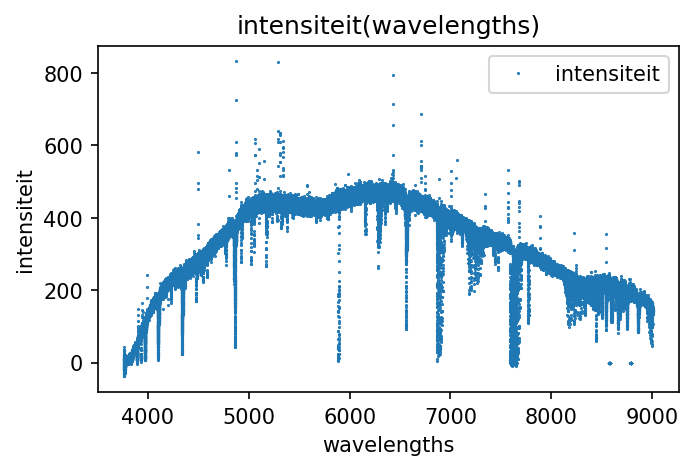

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(5, 3))
ax.set_title('intensiteit(wavelengths)')
ax.plot(wavelengths, spec, '.', markersize = 1, label = 'intensiteit')
ax.set_xlabel('wavelengths')
ax.set_ylabel('intensiteit')
ax.legend()
plt.show()
#plt.tight_layout()
plt.show()
#plt.savefig('Spectrum.png')

## Opgaven

### Definieer een functie om de radiale snelheid te bepalen

- Test de functie op de voorbeeld data uit de voorbereiding
- Laat in een figuur zien hoe je deze radiale snelheid hebt bepaald

#### Radiale snelheid

- Bereken op dezelfde manier de radiale snelheid voor alle spectra die je hebt gekregen
- Kijk ook naar de datum waarop elk spectrum is opgemeten: header['BJD']

#### Figuur

Je weet nu hoe de radiale snelheid verandert in de tijd

- Plot de radiale snelheid als een functie van de observatietijdstipppen
- Als je de tijdsas op 0 wil laten beginnen mag dat (de start van de Juliaanse kalender is niet de start van de waarneming)

In [ ]:


#plt.savefig('V_versus_t_%s.png' %sternaam)

### Bepaal de periode

- Schat vanuit de figuur de amplitude en periode van de radiale snelheid

### Bepaal de massafunctie

### Massafunctie bespreken

Aan het einde van de vorige sectie heb je een waarde voor de massafunctie bepaald. In het laatste onderdeel van dit practicum ga je deze massafunctie verder bespreken

#### Los de massafunctie op voor $m_{2}$

- Los de massafunctie op voor $m_{2}$ voor verschillende inclinaties (zie de practicumhandleiding)

#### Figuur

- Plot $m_{2}(i)$ voor de gevonden massafunctie

In [ ]:


#plt.savefig('Massafunctieoplossing_%s.png' % sternaam)